In [494]:
from logging_ import Logger
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import pandas as pd
from settings import OPTIMAL_HYPERS_BEST, OPTIMAL_HYPERS_NORM
from scores import  SCORES

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [500]:
logger = Logger(logs_dir="logs_targeted")

In [501]:
logger.load_all()
logger.logs_dir="logs_art_add_fmn_to_aa"
logger.load_all()
logger.logs_dir="logs_alma"
logger.load_all()

In [503]:
# DECIDE WHETHER TO add "all" versions wrt individual samples or not
# FMN 100 untargeted + 100 targeted to each class
# ALMA 100 untargeted + 100 targeted to each class


for norm in OPTIMAL_HYPERS_NORM:
        for model in SCORES[norm][0]:
            logger.merge(f"dataset-CIFAR10-norm-{norm}-attack-auto_all-model-{model}", [*logger.where(norm=norm, attack="aa", model=model).keys()])

if best_wrt_sample:
    OPTIMAL_HYPERS = OPTIMAL_HYPERS_BEST
else:
    OPTIMAL_HYPERS = OPTIMAL_HYPERS_NORM

for norm in OPTIMAL_HYPERS:
    for model in SCORES[norm][0]:
        if "Xiao" in model or "Kang" in model:
            continue
        for attack in ["fmn", "alma"]:
            run_ids = [*list(logger.where(model=model, attack=attack, **OPTIMAL_HYPERS[norm]).keys())] + [*list(logger.where(model=model, attack=attack+"_t", **OPTIMAL_HYPERS[norm]).keys())]
            is_slow = lambda x: logger.get_n_steps(x) > 999
            quick_ids = [*filter(lambda x: not is_slow(x), run_ids)]
            if quick_ids:
                logger.merge(f"dataset-CIFAR10-norm-{norm}-attack-{attack}_all-model-{model}-steps-101", quick_ids)

OPTIMAL_HYPERS = OPTIMAL_HYPERS_NORM

# Pair comparison 
Investigate the influence of attacking other class 

In [504]:
sumdic_slow, sumdic_quick = logger.extract_sumdic(OPTIMAL_HYPERS, SCORES)

In [505]:
sumdic=sumdic_quick

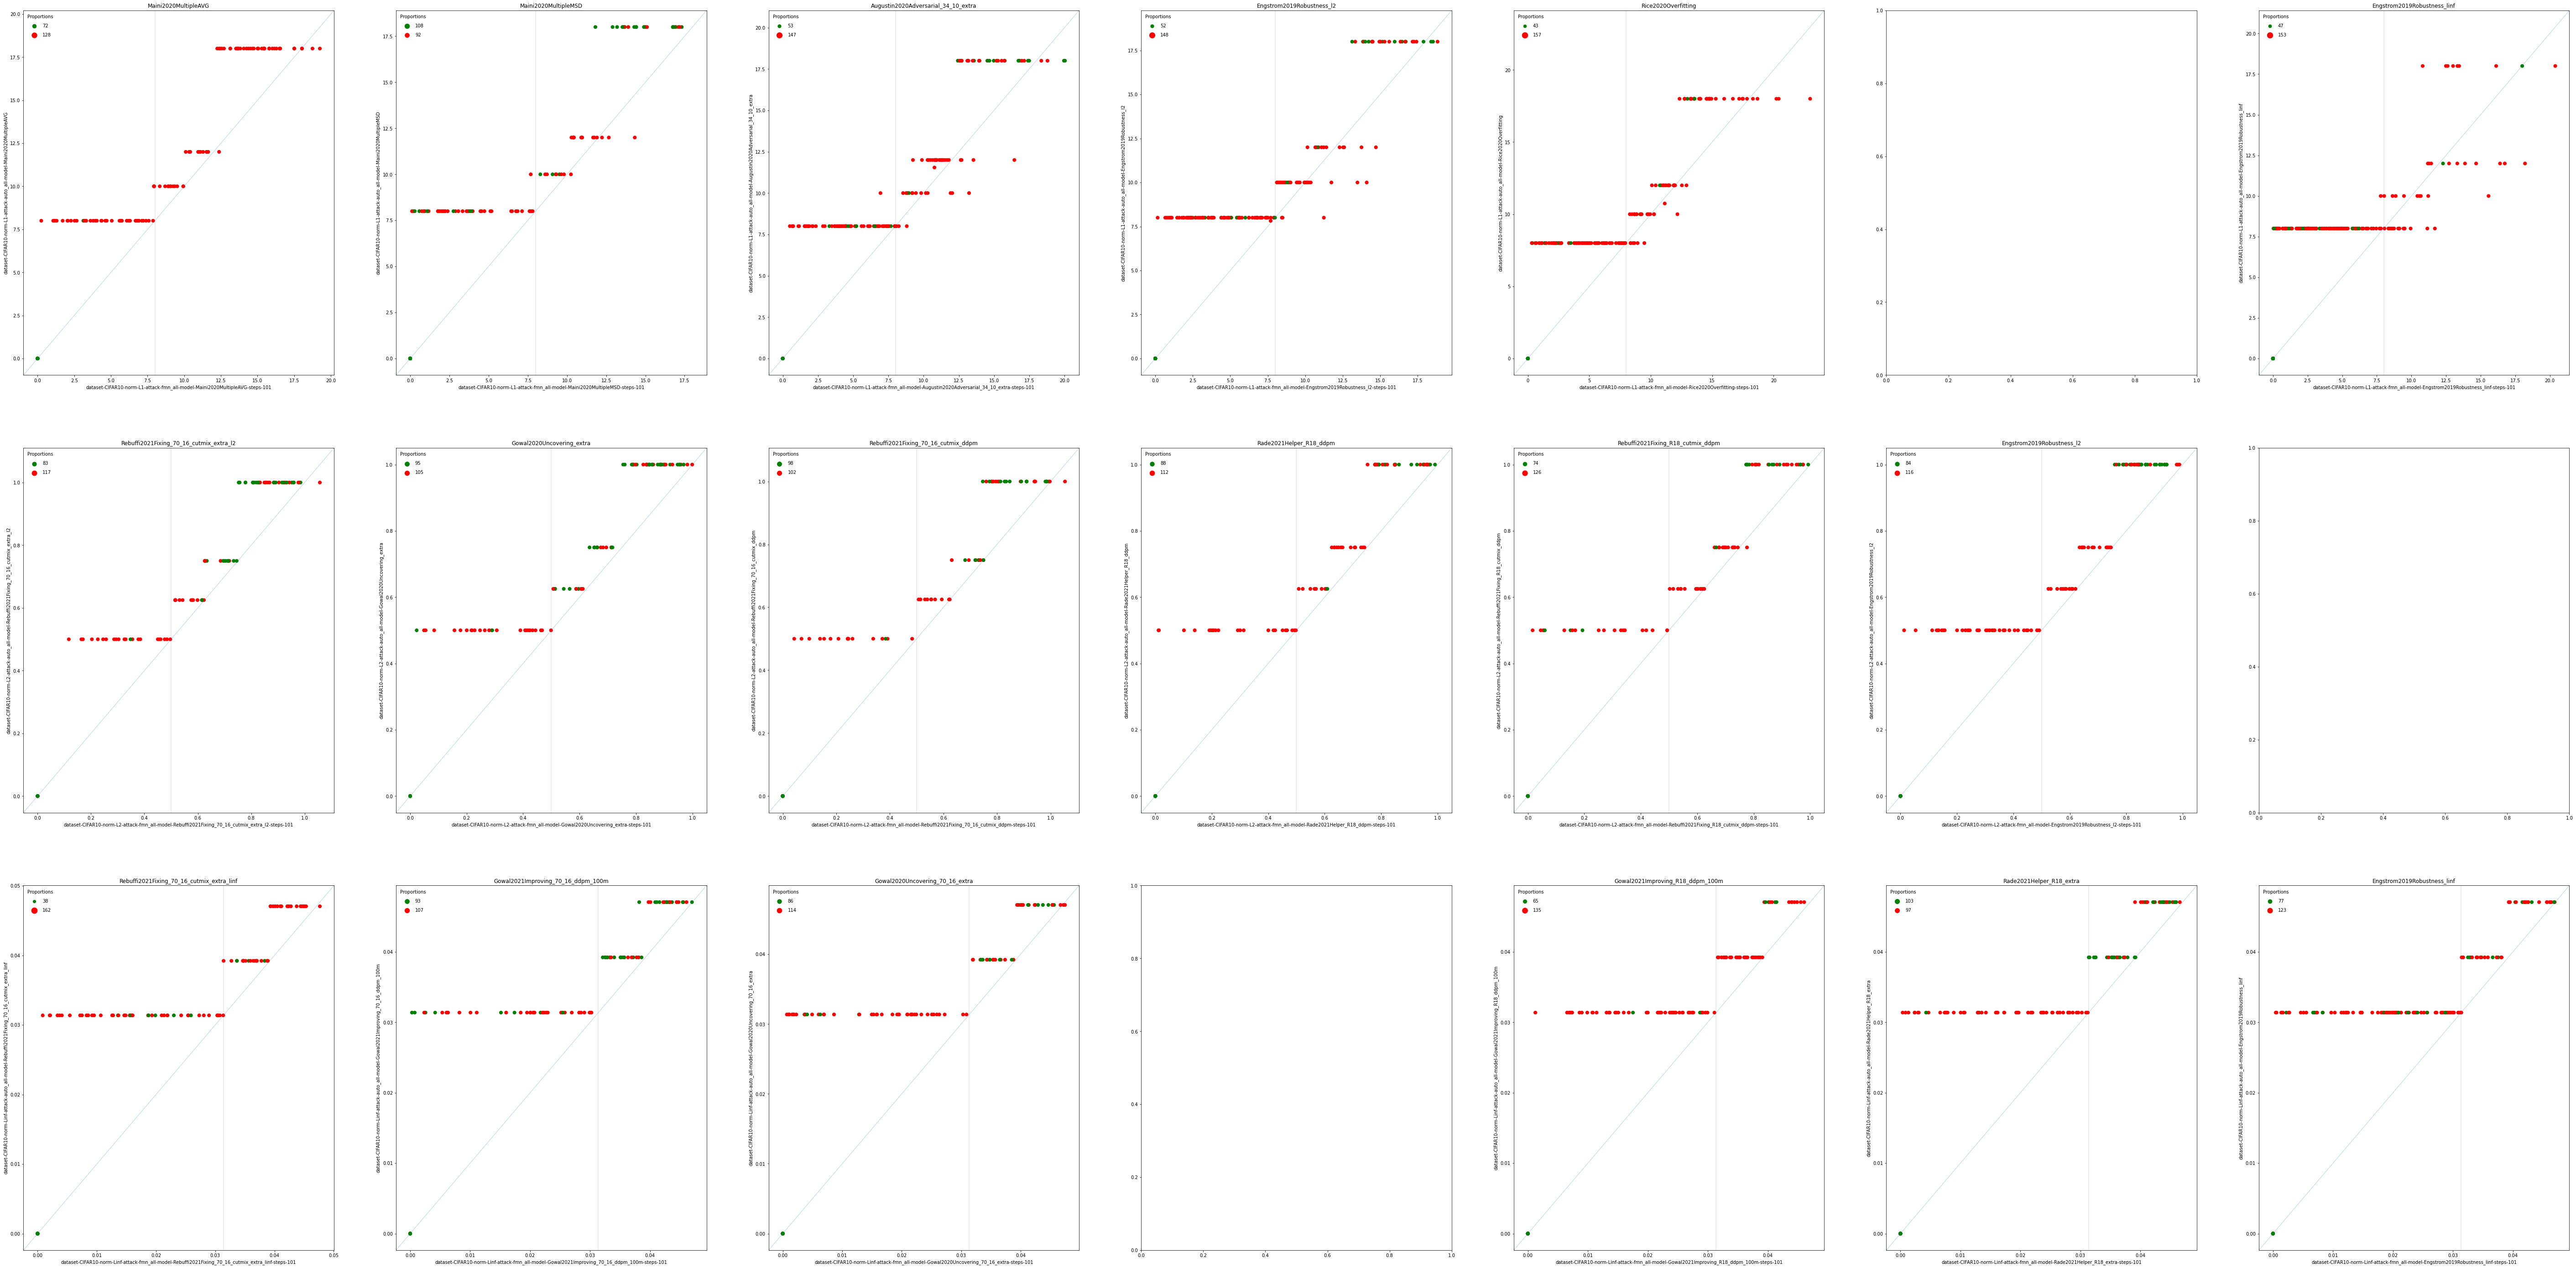

In [506]:
critical = logger.plot_compare_grid(sumdic, a="fmn_all", b="auto_all", figsize=(100,50), simple=True)

In [ ]:
logger.plot_compare_grid(sumdic, a="fmn", b="auto_all", figsize=(100,50))

In [ ]:
logger.plot_compare_grid(sumdic, a="fmn_all", b="auto_all", figsize=(100,50), simple=True)

In [ ]:
logger.plot_compare_grid(sumdic, a="fmn", b="fmn_all", figsize=(100,50), simple=True)

In [ ]:
logger.plot_compare_grid(sumdic, a="apgd", b="auto_all", figsize=(100,50), simple=True)

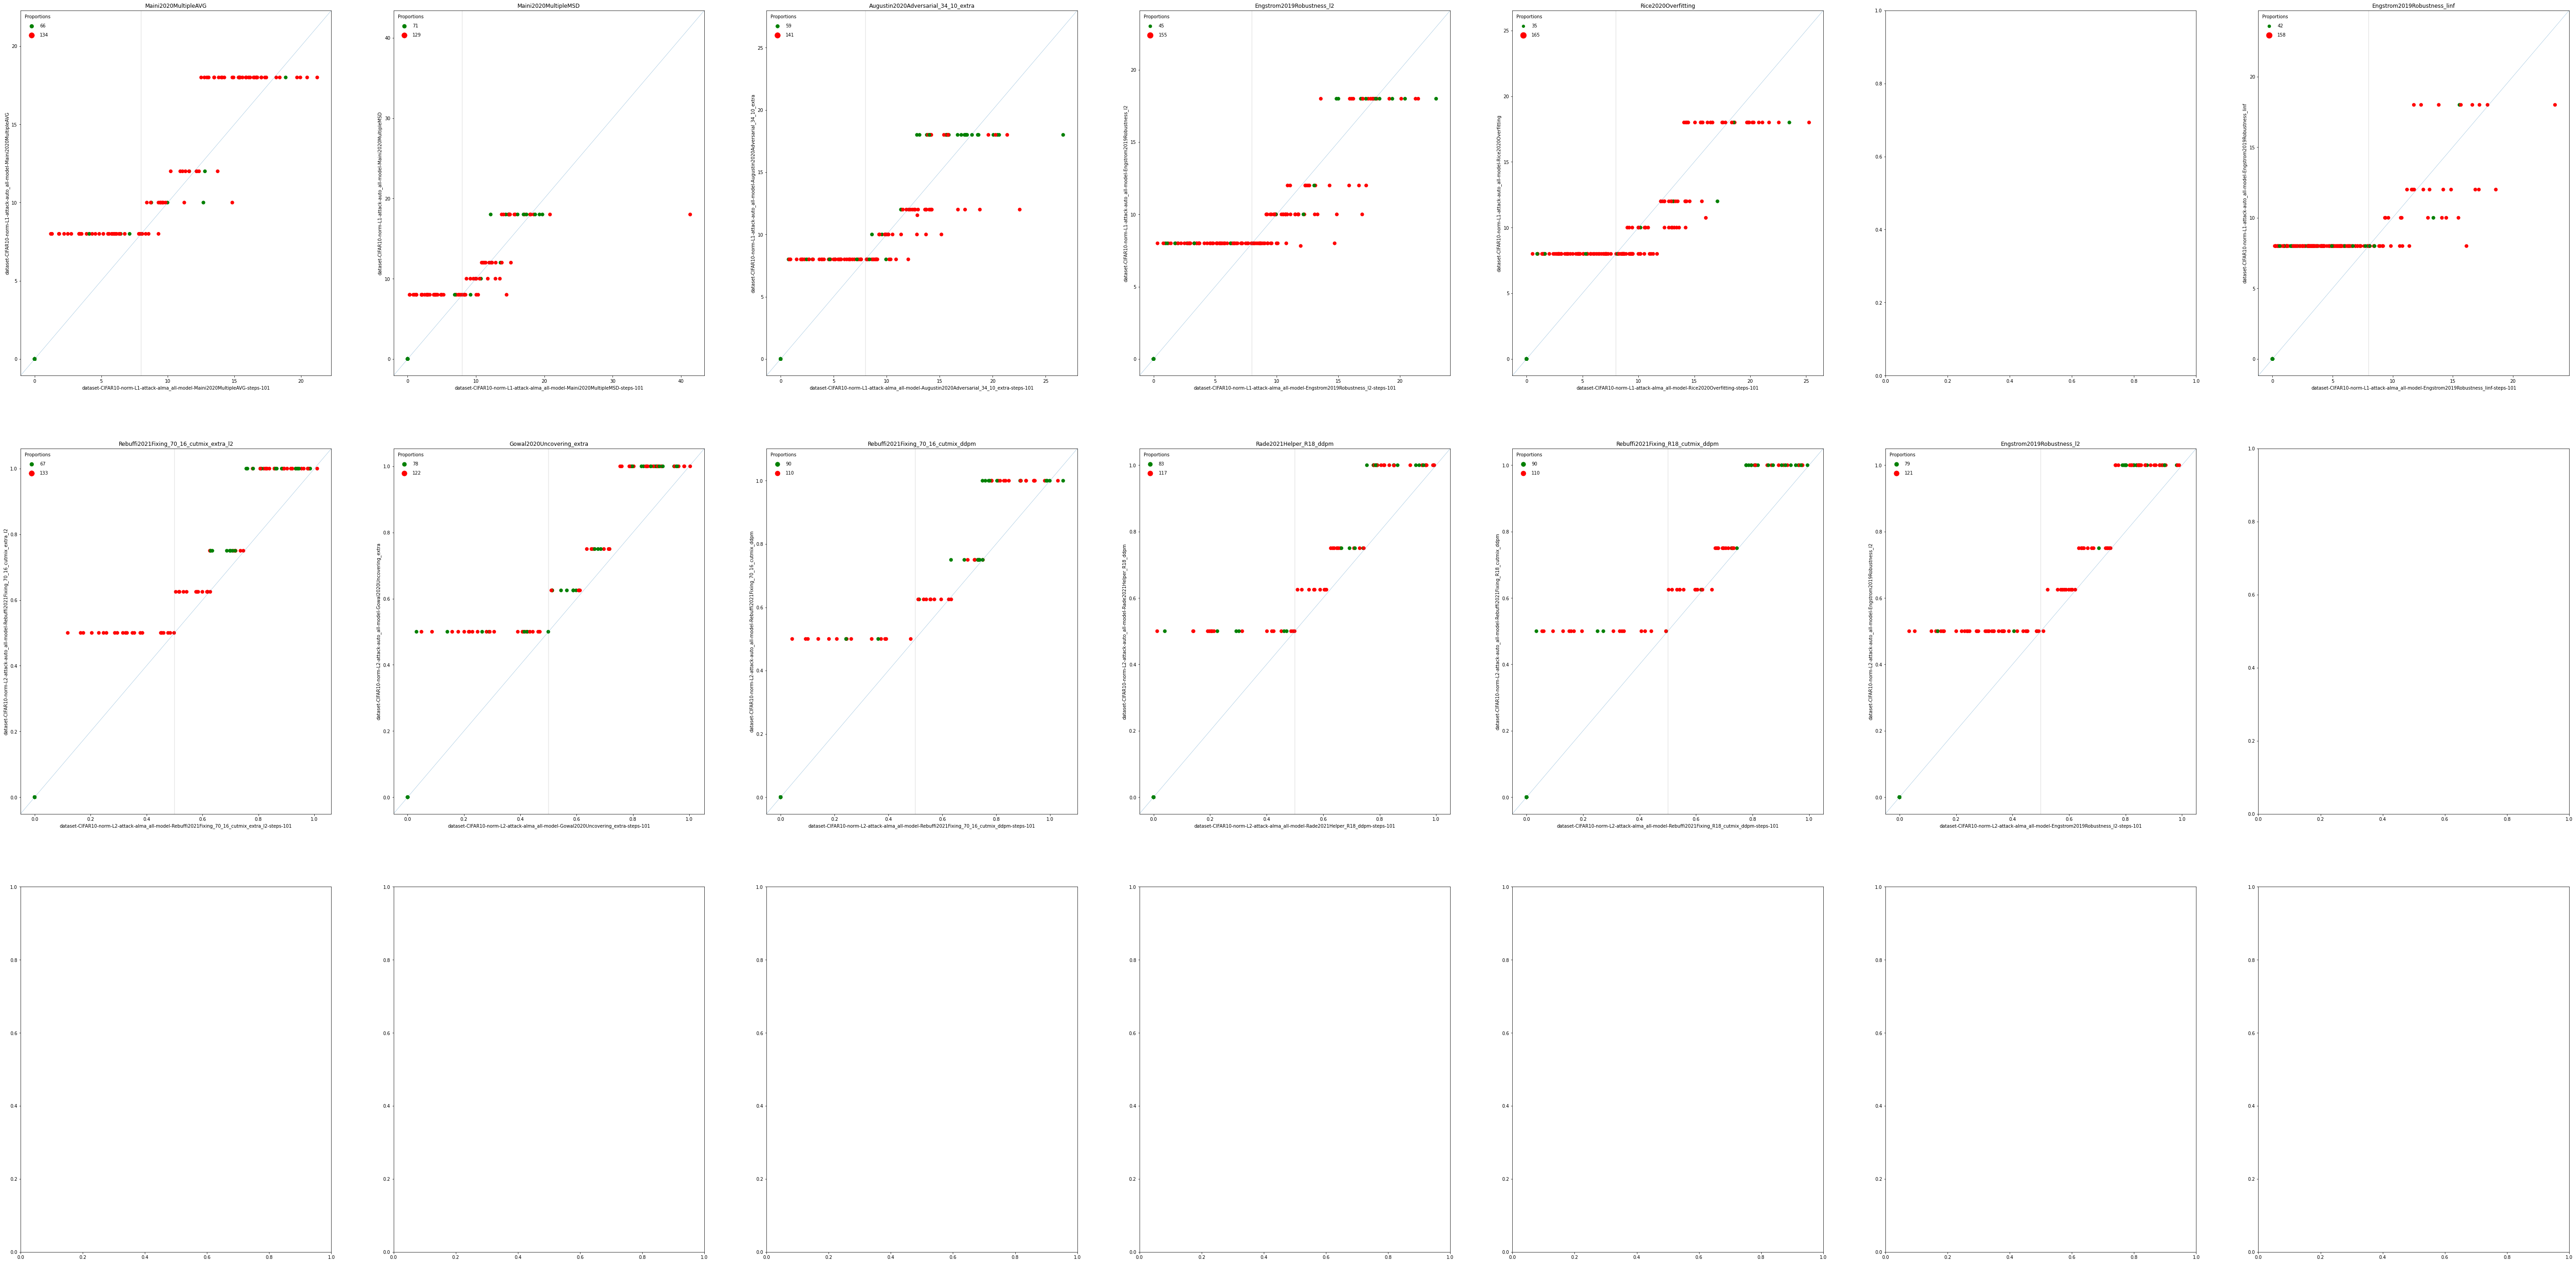

In [507]:
logger.plot_compare_grid(sumdic, a="alma_all", b="auto_all", figsize=(100,50), simple=True)
None

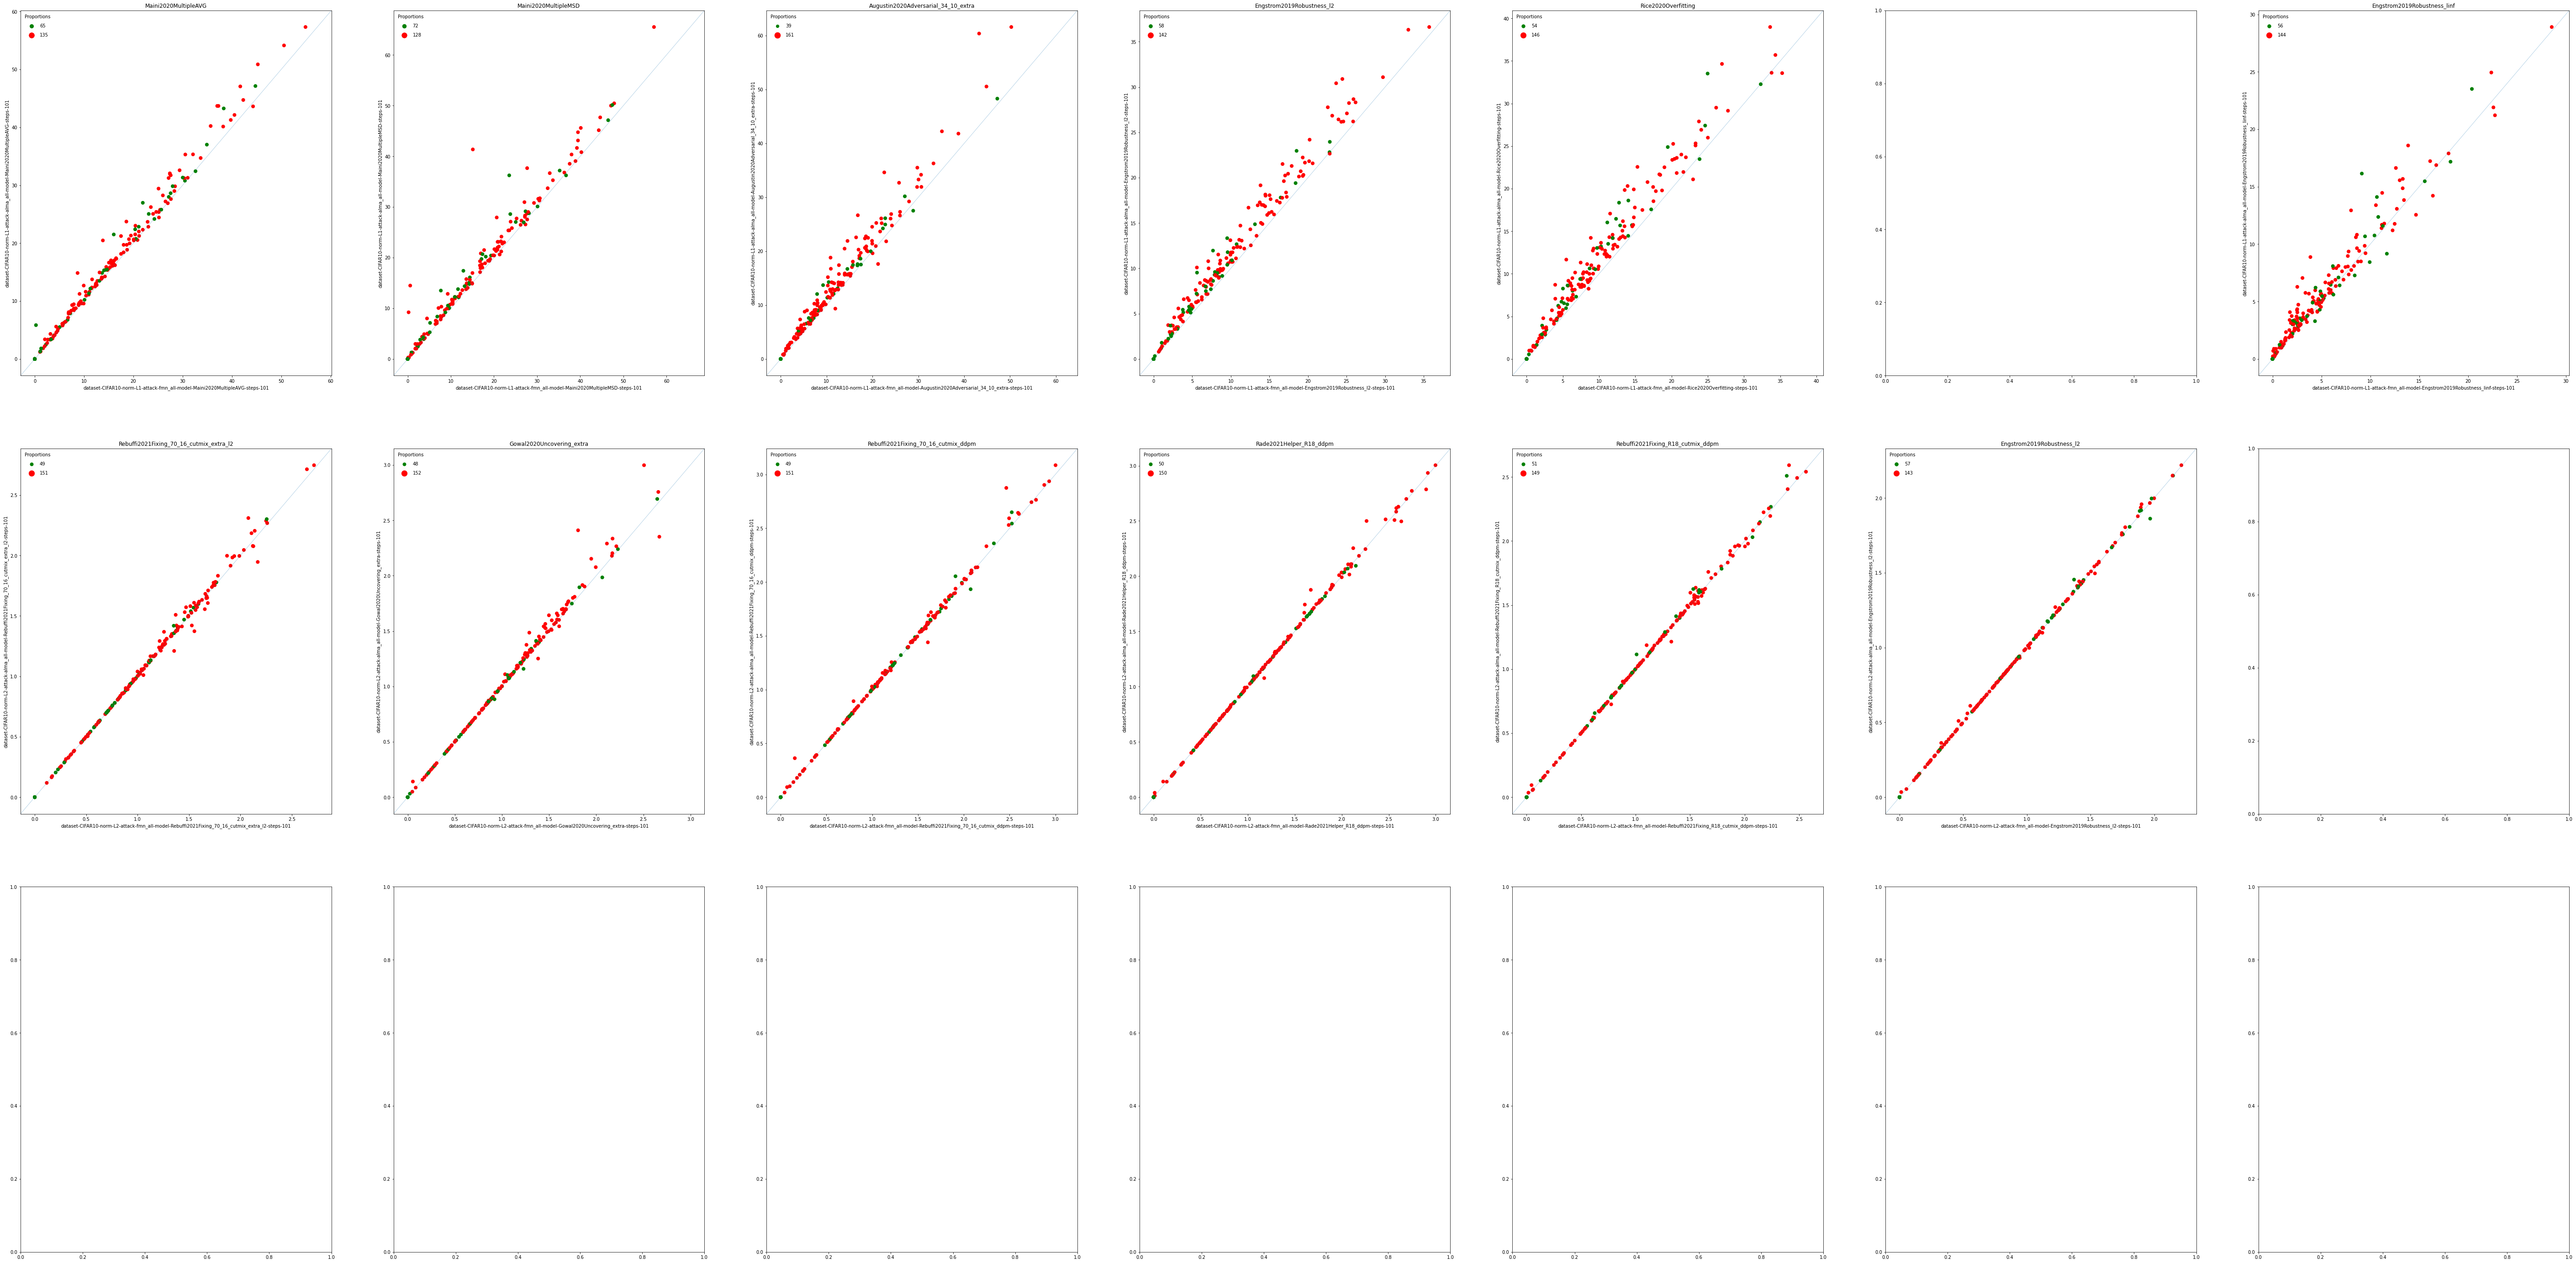

In [508]:
# size_f = lambda classes_a, classes_b: [1 if classes_a[i] != classes_b[i] else 500 for i in range(len(classes_a))]
logger.plot_compare_grid(sumdic, a="fmn_all", b="alma_all", figsize=(100,50), simple=True)
None

In [ ]:
logger.plot_compare_grid(sumdic, a="fmn", b="alma", figsize=(100,50), simple=True)

In [ ]:
logger.plot_compare_grid(sumdic, a="fmn", b="pdpgd", figsize=(100,50), simple=True)

In [ ]:
logger.plot_compare_grid(sumdic, a="fmn", b="apgd", figsize=(100,50), simple=True)

In [ ]:
logger.plot_compare_grid(sumdic, a="alma", b="apgd", figsize=(100,50), simple=True)

In [ ]:
# preventing from ensembling all wrt sample, turn on if needed 
if best_wrt_sample:
    logger = Logger(logs_dir=logger.logs_dir)
    logger.load_all()
    for norm in OPTIMAL_HYPERS:
        for model in SCORES[norm][0]:
            logger.merge(f"dataset-CIFAR10-norm-{norm}-attack-auto_all-model-{model}", [*logger.where(norm=norm, attack="aa", model=model).keys()])

    sumdic_slow, sumdic_quick = logger.extract_sumdic(OPTIMAL_HYPERS, SCORES)
    sumdic=sumdic_slow

In [ ]:
logger.ensemble(OPTIMAL_HYPERS, SCORES)
sumdic, _ = logger.extract_sumdic(OPTIMAL_HYPERS, SCORES)

In [ ]:
logger.plot_compare_grid(sumdic, a="ensemble", b="auto_all", figsize=(100,50), simple=True)
None

In [ ]:
logger.plot_compare_grid(sumdic, a="fmn", b="ensemble", figsize=(100,50), simple=True)
None

# Detail  
- what is the "best" class for each sample, and what class was found by individual attacks?

In [ ]:
logger.plot_compare_all_grid(sumdic, figsize=(200,100), initial="follow")

# Detail focus on selected samples 
detail of samples that were worse by selected attack then by AA

In [ ]:
logger.plot_compare_all_grid(sumdic, figsize=(200,100), initial="follow", selected=critical)

# Development of the class targeted during the untargeted attacks
TODO
--> follow up - observe the development of class targeted by the attack (FMN)

In [ ]:
from settings import OPTIMAL_HYPERS
from functools import partial 
logger.plot_grid(partial(logger.plot_targeted_class, sumdic=sumdic), figsize=(100, 50), where_settings={**OPTIMAL_HYPERS["Linf"], "attack":"fmn"})

In [ ]:
logger.plot_grid(partial(logger.plot_targeted_class, sumdic=sumdic, selected=critical), figsize=(100, 50), where_settings={**OPTIMAL_HYPERS["Linf"], "attack":"fmn"})

In [ ]:
logger.plot_grid(partial(logger.plot_targeted_class, sumdic=sumdic), figsize=(100, 50), where_settings={**OPTIMAL_HYPERS["Linf"], "attack":"apgd"})

In [ ]:
logger.plot_grid(partial(logger.plot_targeted_class, sumdic=sumdic), figsize=(100, 50), where_settings={**OPTIMAL_HYPERS["L2"], "attack":"alma"})

In [ ]:
logger.plot_grid(partial(logger.plot_targeted_class, sumdic=sumdic), figsize=(100, 50), where_settings={**OPTIMAL_HYPERS["L1"], "attack":"fmn"})

In [ ]:
logger.plot_grid(partial(logger.plot_targeted_class, sumdic=sumdic), figsize=(100, 50), where_settings={**OPTIMAL_HYPERS["L1"], "attack":"pdpgd"})